In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Learning/Datasets/Sales Managers.xlsx', sheet_name= 'Raw', header= 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      0 non-null      float64       
 1   Order ID        262 non-null    int64         
 2   Date            262 non-null    datetime64[ns]
 3   Product         262 non-null    object        
 4   Price           262 non-null    float64       
 5   Quantity        262 non-null    float64       
 6   Purchase Type   262 non-null    object        
 7   Payment Method  262 non-null    object        
 8   Manager         262 non-null    object        
 9   City            262 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 20.6+ KB


In [ ]:
df.head()

,Unnamed: 0,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,NaN,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
1,NaN,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
2,NaN,10454,2022-11-07,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon
3,NaN,10455,2022-11-08,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin
4,NaN,10456,2022-11-08,Chicken Sandwiches,9.95,201.005025,In-store,Credit Card,Walter Muller,Berlin


In [ ]:
df.drop(columns= ['Unnamed: 0'], inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        262 non-null    int64         
 1   Date            262 non-null    datetime64[ns]
 2   Product         262 non-null    object        
 3   Price           262 non-null    float64       
 4   Quantity        262 non-null    float64       
 5   Purchase Type   262 non-null    object        
 6   Payment Method  262 non-null    object        
 7   Manager         262 non-null    object        
 8   City            262 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 18.6+ KB


In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
# check data integrity

for col in df.columns:
    if df[col].dtype == 'object' and len(df[col].unique()) <= 15 :
        print(f"{col} unique values :")
        print(df[col].unique())

Product unique values :
['Fries' 'Beverages' 'Sides & Other' 'Burgers' 'Chicken Sandwiches']
Purchase_Type unique values :
['Online ' 'In-store ' 'Drive-thru ']
Payment_Method unique values :
[' Gift Card' ' Credit Card' ' Cash']
Manager unique values :
['Tom      Jackson' '       Pablo Perez' 'Joao    Silva' 'Walter Muller'
 'Remy    Monet' 'Remy Monet' '       Remy Monet' 'Remy     Monet'
 'Pablo Perez' 'Pablo   Perez' 'Pablo  Perez' 'Pablo    Perez'
 'Joao Silva' 'Tom Jackson']
City unique values :
['London' 'Madrid' 'Lisbon' 'Berlin' 'Paris']


In [ ]:
# Function to remove extra whitespaces
def remove_extra_whitespaces(text):
    if isinstance(text, str):
      return " ".join(text.split())
    return text

# Apply the function to relevant columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(remove_extra_whitespaces)


In [ ]:
# check data integrity

for col in df.columns:
    if df[col].dtype == 'object' and len(df[col].unique()) <= 15 :
        print(f"{col} unique values :")
        print(df[col].unique())

Product unique values :
['Fries' 'Beverages' 'Sides & Other' 'Burgers' 'Chicken Sandwiches']
Purchase_Type unique values :
['Online' 'In-store' 'Drive-thru']
Payment_Method unique values :
['Gift Card' 'Credit Card' 'Cash']
Manager unique values :
['Tom Jackson' 'Pablo Perez' 'Joao Silva' 'Walter Muller' 'Remy Monet']
City unique values :
['London' 'Madrid' 'Lisbon' 'Berlin' 'Paris']


In [ ]:
df.head()

,Order_ID,Date,Product,Price,Quantity,Purchase_Type,Payment_Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-11-07,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-11-08,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-11-08,Chicken Sandwiches,9.95,201.005025,In-store,Credit Card,Walter Muller,Berlin


In [ ]:
# add new column named Profit

df['Profit'] = df['Quantity'] * df['Price']
df.head()

,Order_ID,Date,Product,Price,Quantity,Purchase_Type,Payment_Method,Manager,City,Profit
0,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London,2000.0
1,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid,2200.0
2,10454,2022-11-07,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon,1000.0
3,10455,2022-11-08,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin,7400.0
4,10456,2022-11-08,Chicken Sandwiches,9.95,201.005025,In-store,Credit Card,Walter Muller,Berlin,2000.0


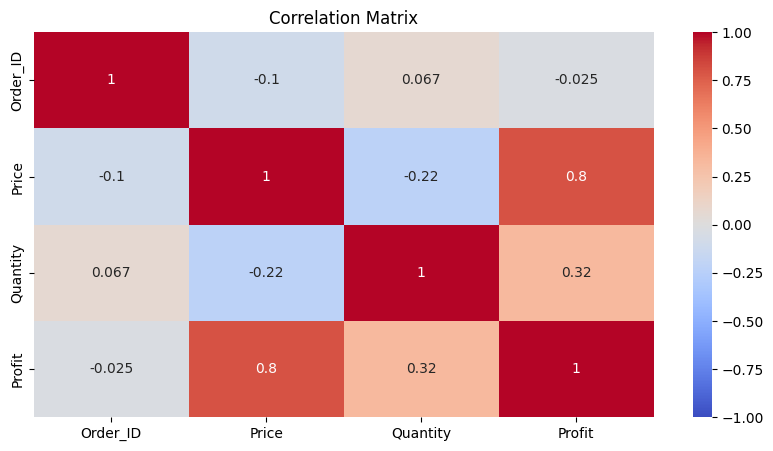

In [ ]:
# view correlation

plt.figure(figsize= (10, 5))
sns.heatmap(data= df.corr(numeric_only= True),
            cmap= 'coolwarm',
            vmin= -1,
            vmax= 1,
            annot= True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Analyze Orders for each Manager

print(df.groupby('Manager', as_index= False).agg({'Order_ID': 'count'}).sort_values(by= 'Order_ID', ascending= False))

         Manager  Order_ID
0     Joao Silva        78
3    Tom Jackson        75
1    Pablo Perez        50
4  Walter Muller        30
2     Remy Monet        29


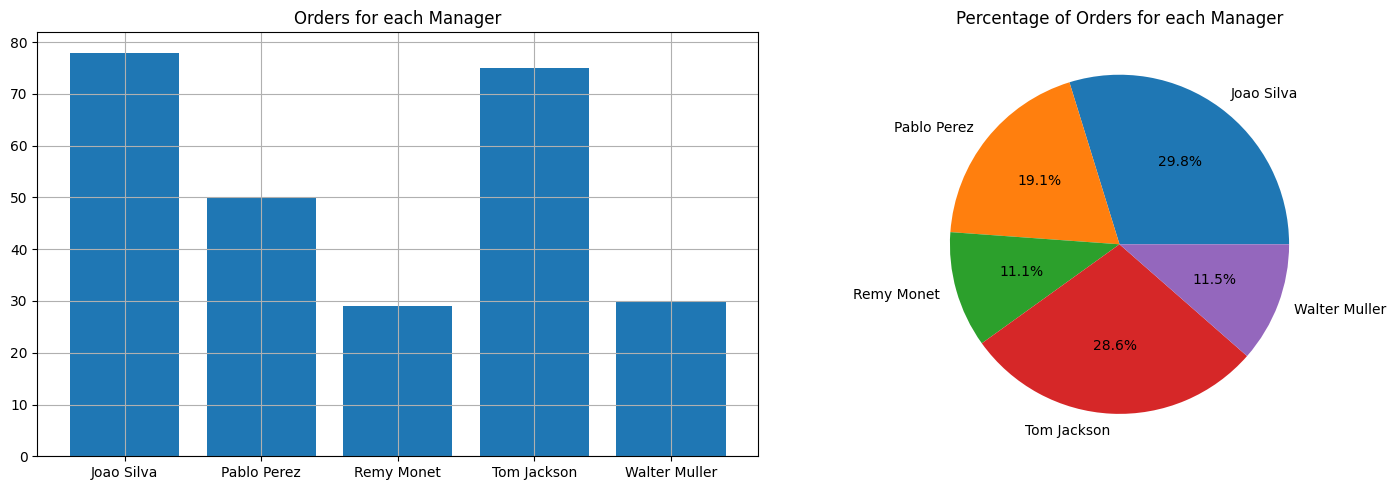

In [ ]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 2, 1)
plt.bar(data= df.groupby('Manager', as_index= False).agg({'Order_ID': 'count'}),
        x= df.groupby('Manager', as_index= False).agg({'Order_ID': 'count'})['Manager'],
        height= df.groupby('Manager', as_index= False).agg({'Order_ID': 'count'})['Order_ID'])
plt.title('Orders for each Manager')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.pie(data= df.groupby('Manager', as_index= False).agg({'Order_ID': 'count'}),
        x= df.groupby('Manager', as_index= False).agg({'Order_ID': 'count'})['Order_ID'],
        labels= df.groupby('Manager', as_index= False).agg({'Order_ID': 'count'})['Manager'],
        autopct= '%1.1f%%')
plt.title('Percentage of Orders for each Manager')

plt.tight_layout()
plt.show()

In [ ]:
# Analyze Profit for each Manager

print(df.groupby('Manager', as_index= False).agg({'Profit': 'sum'}).sort_values(by= 'Profit', ascending= False).round(2))

         Manager     Profit
0     Joao Silva  283184.52
3    Tom Jackson  211200.00
1    Pablo Perez  143600.00
4  Walter Muller  100600.00
2     Remy Monet   81800.00


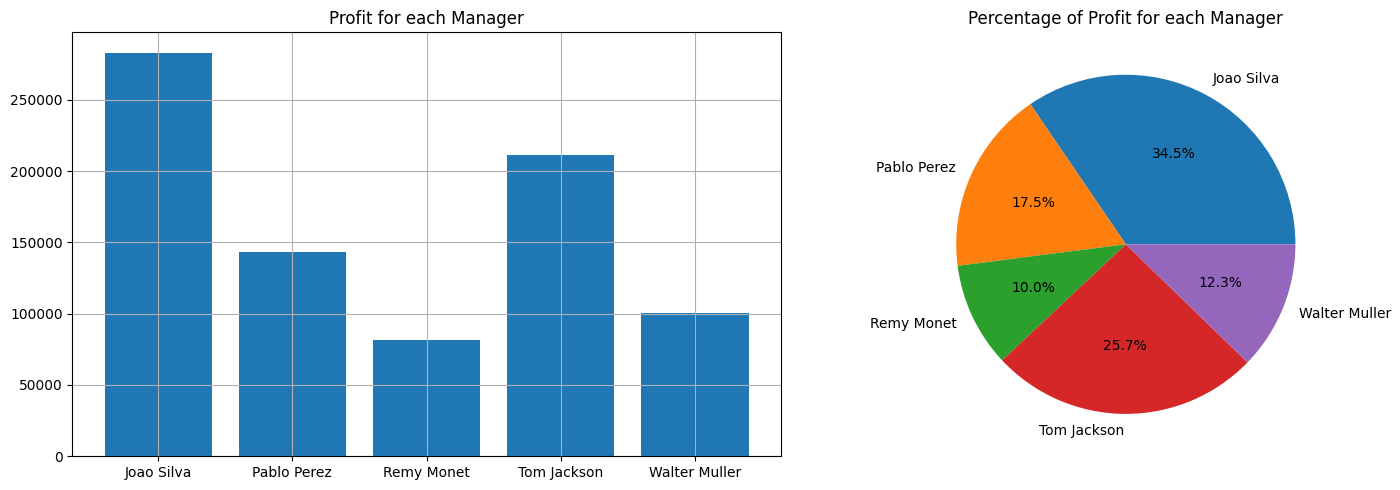

In [ ]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 2, 1)
plt.bar(data= df.groupby('Manager', as_index= False).agg({'Profit': 'sum'}),
        x= df.groupby('Manager', as_index= False).agg({'Profit': 'sum'})['Manager'],
        height= df.groupby('Manager', as_index= False).agg({'Profit': 'sum'})['Profit'])
plt.title('Profit for each Manager')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.pie(data= df.groupby('Manager', as_index= False).agg({'Profit': 'sum'}),
        x= df.groupby('Manager', as_index= False).agg({'Profit': 'sum'})['Profit'],
        labels= df.groupby('Manager', as_index= False).agg({'Profit': 'sum'})['Manager'],
        autopct= '%1.1f%%')
plt.title('Percentage of Profit for each Manager')

plt.tight_layout()
plt.show()

In [ ]:
# Analyze profit for each Manager regarding to Products

print(df.groupby(['Product', 'Manager']).agg({'Profit': 'sum'}).sort_values(by= ['Product', 'Profit'], ascending= [True, False]).round(2))

                                     Profit
Product            Manager                 
Beverages          Joao Silva      56122.03
                   Tom Jackson     28800.00
                   Pablo Perez     22600.00
                   Walter Muller   12000.00
                   Remy Monet      10400.00
Burgers            Joao Silva     123452.19
                   Tom Jackson    101800.00
                   Pablo Perez     73600.00
                   Walter Muller   53400.00
                   Remy Monet      39400.00
Chicken Sandwiches Joao Silva      36639.20
                   Tom Jackson     32000.00
                   Pablo Perez     18000.00
                   Walter Muller   16000.00
                   Remy Monet      12000.00
Fries              Joao Silva      47674.50
                   Tom Jackson     34600.00
                   Pablo Perez     19400.00
                   Remy Monet      15000.00
                   Walter Muller   13200.00
Sides & Other      Joao Silva   

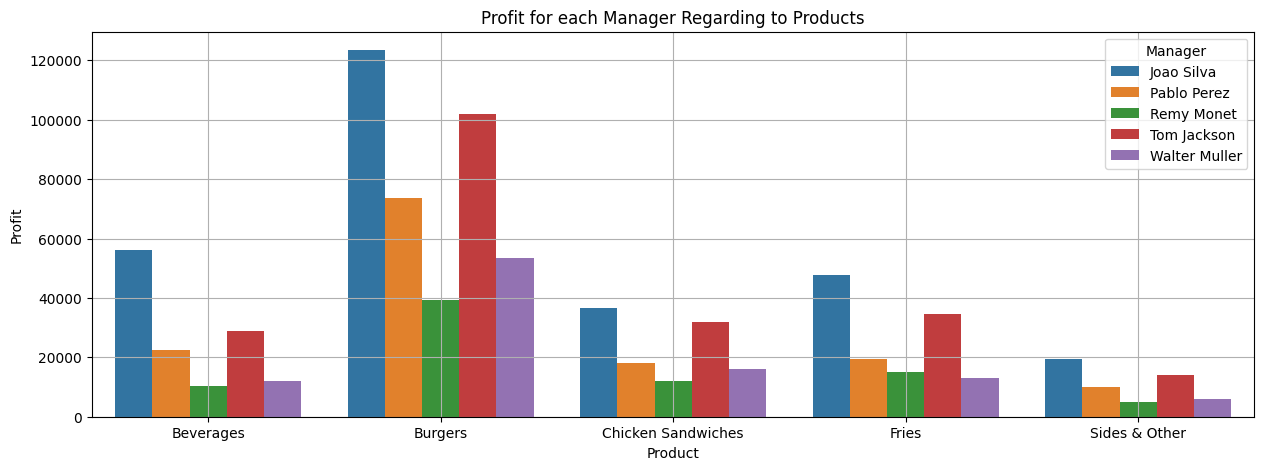

In [ ]:
plt.figure(figsize= (15, 5))

sns.barplot(data= df.groupby(['Product', 'Manager']).agg({'Profit': 'sum'}),
            x= 'Product',
            y= 'Profit',
            hue= 'Manager')
plt.title('Profit for each Manager Regarding to Products')
plt.grid(True)
plt.show()

In [ ]:
px.pie(data_frame= df.groupby(['Product', 'Manager'], as_index= False).agg({'Profit': 'sum'}),
       names= 'Product',
       values= 'Profit',
       facet_col= 'Manager',
       title= 'Profit for each Manager Regarding to Product')

In [ ]:
# Analyze Profit for each Mnager regarding to City

print(df.groupby(['Manager', 'City'], as_index= False).agg({'Order_ID': 'count'})) # How many City for each Manager that making Profit?

         Manager    City  Order_ID
0     Joao Silva  Lisbon        78
1    Pablo Perez  Madrid        50
2     Remy Monet   Paris        29
3    Tom Jackson  London        75
4  Walter Muller  Berlin        30


In [ ]:
print(df.groupby(['Manager', 'City'], as_index= False).agg({'Profit': 'sum'}).sort_values(by= ['Manager', 'Profit'], ascending= [True, False]).round(2))

         Manager    City     Profit
0     Joao Silva  Lisbon  283184.52
1    Pablo Perez  Madrid  143600.00
2     Remy Monet   Paris   81800.00
3    Tom Jackson  London  211200.00
4  Walter Muller  Berlin  100600.00


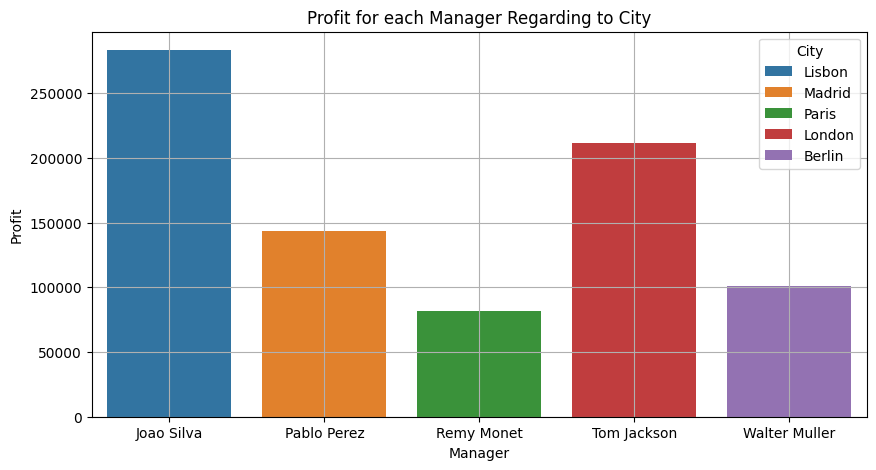

In [ ]:
plt.figure(figsize= (10, 5))
sns.barplot(data=df.groupby(['Manager', 'City'], as_index=False).agg({'Profit': 'sum'}),
            x='Manager', y='Profit', hue='City')
plt.title('Profit for each Manager Regarding to City')
plt.grid(True)
plt.show()

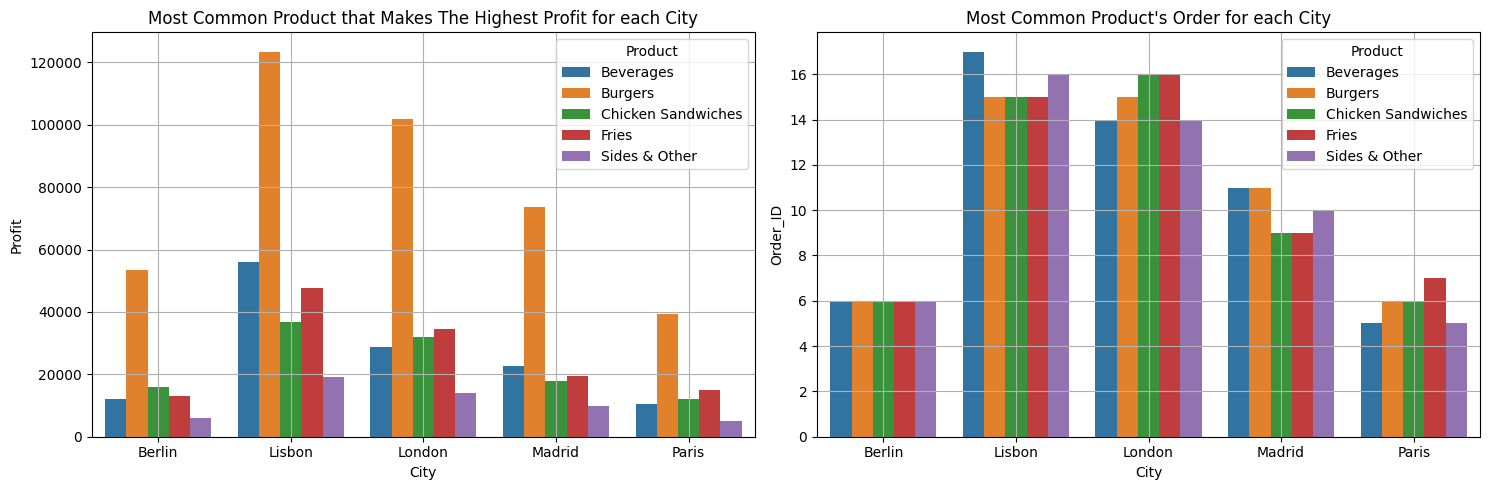

In [ ]:
# Analyze most common Product for each City

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data= df.groupby(['City', 'Product'], as_index= False).agg({'Profit': 'sum'}),
            x= 'City',
            y= 'Profit',
            hue= 'Product')
plt.title('Most Common Product that Makes The Highest Profit for each City')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(data= df.groupby(['City', 'Product']).agg({'Order_ID': 'count'}),
              x= 'City',
              y= 'Order_ID',
              hue= 'Product')
plt.title("Most Common Product's Order for each City")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
px.pie(data_frame= df.groupby(['City', 'Product'], as_index= False).agg({'Profit': 'sum'}),
       names= 'Product',
       values= 'Profit',
       facet_col= 'City',
       title= 'Percentage of Most Common Product for each City')

In [ ]:
# Analyze Most Common Purchase Type for each Manager That Making the Highest Profit

print(df.groupby(['Manager', 'Purchase_Type'], as_index= False).agg({'Profit': 'sum'}).sort_values(by= ['Manager', 'Profit'], ascending= [True, False]).round(2))

          Manager Purchase_Type     Profit
1      Joao Silva      In-store  170384.52
2      Joao Silva        Online   92600.00
0      Joao Silva    Drive-thru   20200.00
4     Pablo Perez      In-store   77400.00
3     Pablo Perez    Drive-thru   64000.00
5     Pablo Perez        Online    2200.00
6      Remy Monet    Drive-thru   35800.00
8      Remy Monet        Online   27800.00
7      Remy Monet      In-store   18200.00
10    Tom Jackson        Online  182600.00
9     Tom Jackson    Drive-thru   28600.00
12  Walter Muller      In-store   65200.00
11  Walter Muller    Drive-thru   35400.00


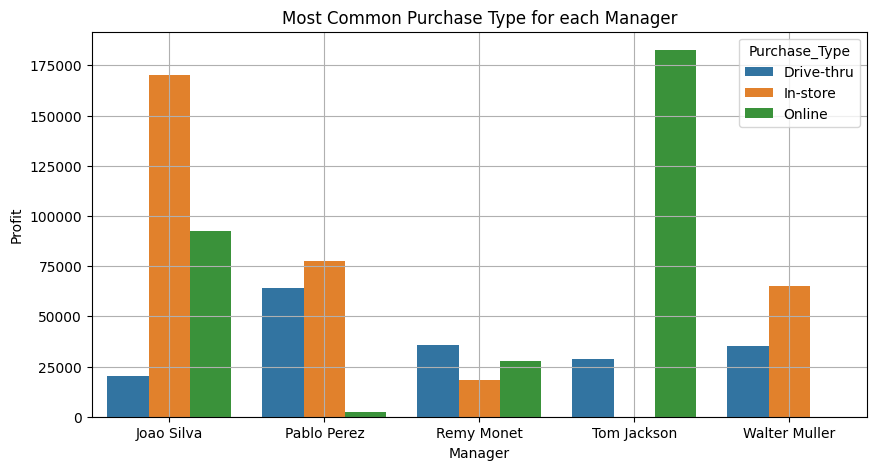

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df.groupby(['Manager', 'Purchase_Type'], as_index=False).agg({'Profit': 'sum'}),
            x='Manager', y='Profit', hue='Purchase_Type')
plt.title('Most Common Purchase Type for each Manager')
plt.grid(True)
plt.show()

In [ ]:
px.pie(data_frame= df.groupby(['Manager', 'Purchase_Type'], as_index= False).agg({'Profit': 'sum'}),
       names= 'Purchase_Type',
       values= 'Profit',
       facet_col= 'Manager',
       title= 'Most Common Purchase Type That Makes The Highest Profit for each Manager')

In [ ]:
# Analyze Most Common Payment Method for each Manager That Making the Highest Profit

print(df.groupby(['Manager', 'Payment_Method'], as_index= False).agg({'Profit': 'sum'}).sort_values(by= ['Manager', 'Profit'], ascending= [True, False]).round(2))

          Manager Payment_Method     Profit
0      Joao Silva           Cash  133200.00
1      Joao Silva    Credit Card   81784.52
2      Joao Silva      Gift Card   68200.00
4     Pablo Perez    Credit Card  140400.00
5     Pablo Perez      Gift Card    2200.00
3     Pablo Perez           Cash    1000.00
7      Remy Monet    Credit Card   46000.00
6      Remy Monet           Cash   35800.00
9     Tom Jackson    Credit Card  134000.00
10    Tom Jackson      Gift Card   60800.00
8     Tom Jackson           Cash   16400.00
11  Walter Muller           Cash   52800.00
13  Walter Muller      Gift Card   37400.00
12  Walter Muller    Credit Card   10400.00


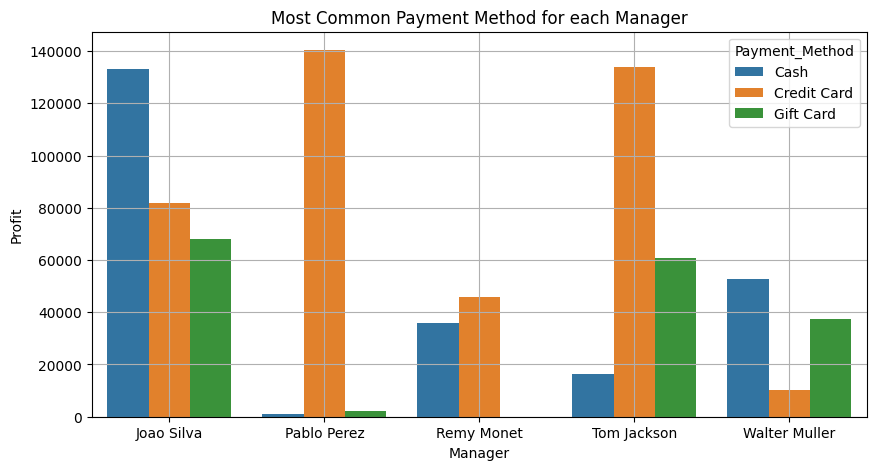

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df.groupby(['Manager', 'Payment_Method'], as_index=False).agg({'Profit': 'sum'}),
            x='Manager', y='Profit', hue='Payment_Method')
plt.title('Most Common Payment Method for each Manager')
plt.grid(True)
plt.show()

In [ ]:
px.pie(data_frame= df.groupby(['Manager', 'Payment_Method'], as_index= False).agg({'Profit': 'sum'}),
       names= 'Payment_Method',

       values= 'Profit',
       facet_col= 'Manager',
       title= 'Most Common Payment Method That Makes The Highest Profit for each Manager')

# Time Series Analysis

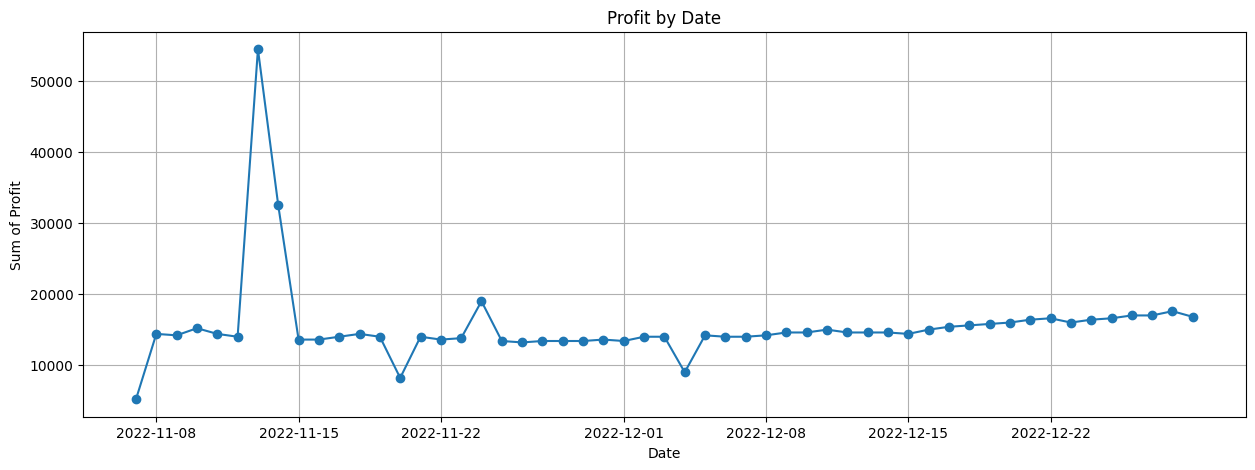

In [ ]:
plt.figure(figsize= (15, 5))
plt.plot(df.set_index('Date').groupby('Date').agg({'Profit': 'sum'}),
         marker= 'o')
plt.title('Profit by Date')
plt.xlabel('Date')
plt.ylabel('Sum of Profit')
plt.grid(True)
plt.show()

In [ ]:
# Analyze Profit for each Manager by Date Regarding to Average Price

# create function to vis data

def draw_charts(data_frame, manager):
    plt.figure(figsize= (15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(data_frame[data_frame['Manager'] == manager].groupby('Date').agg({'Profit': 'sum'}),
             marker= 'o')
    plt.title(f'Profit by Date for {manager}')
    plt.xlabel('Date')
    plt.ylabel('Sum of Profit')
    plt.xticks(rotation= 90)
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(data_frame[data_frame['Manager'] == manager].groupby('Date').agg({'Price': 'mean'}),
             marker= 'o')
    plt.title(f'AVG of Price by Date for {manager}')
    plt.xlabel('Date')
    plt.ylabel('Average of Price')
    plt.xticks(rotation= 90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

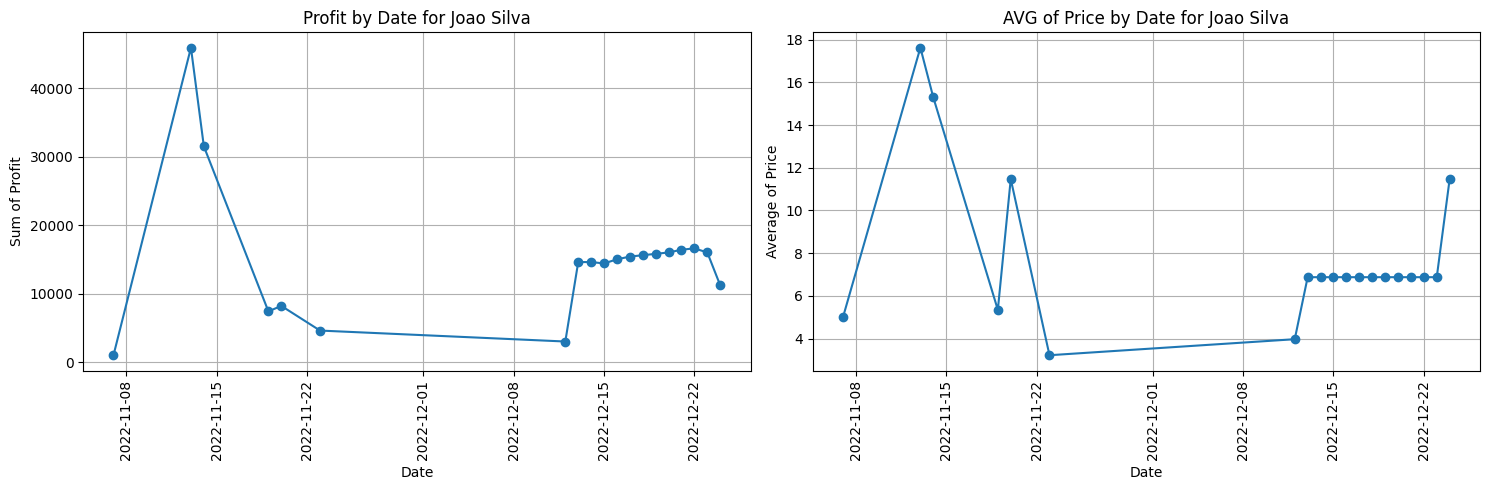

In [ ]:
df_date= df.set_index('Date')

draw_charts(df_date, 'Joao Silva')

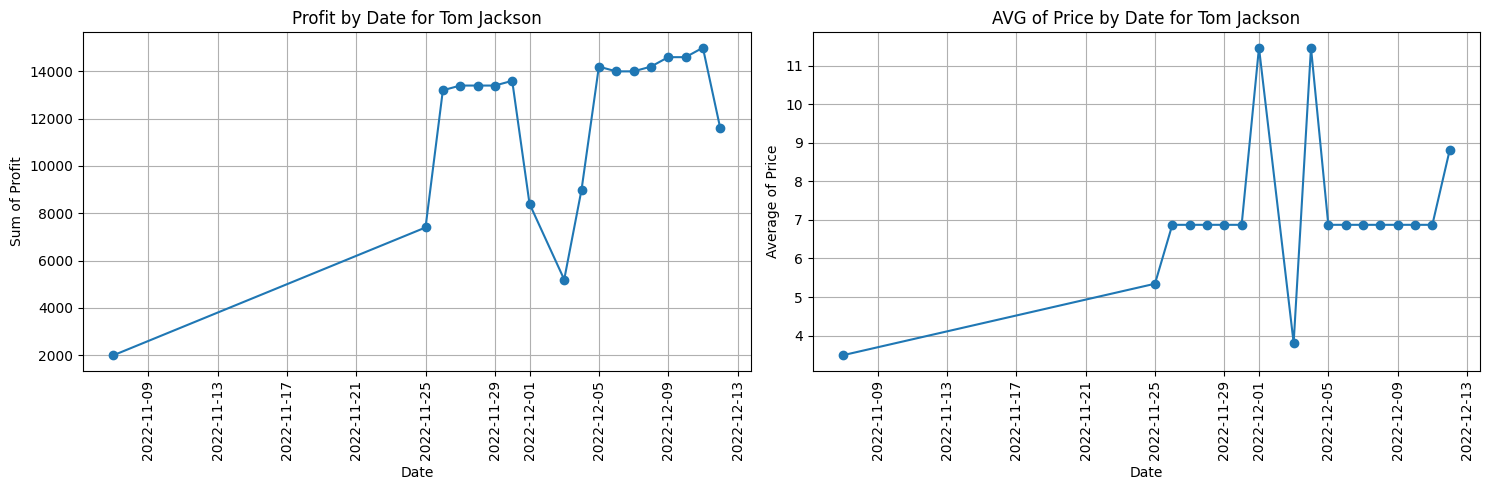

In [ ]:
draw_charts(df_date, 'Tom Jackson')

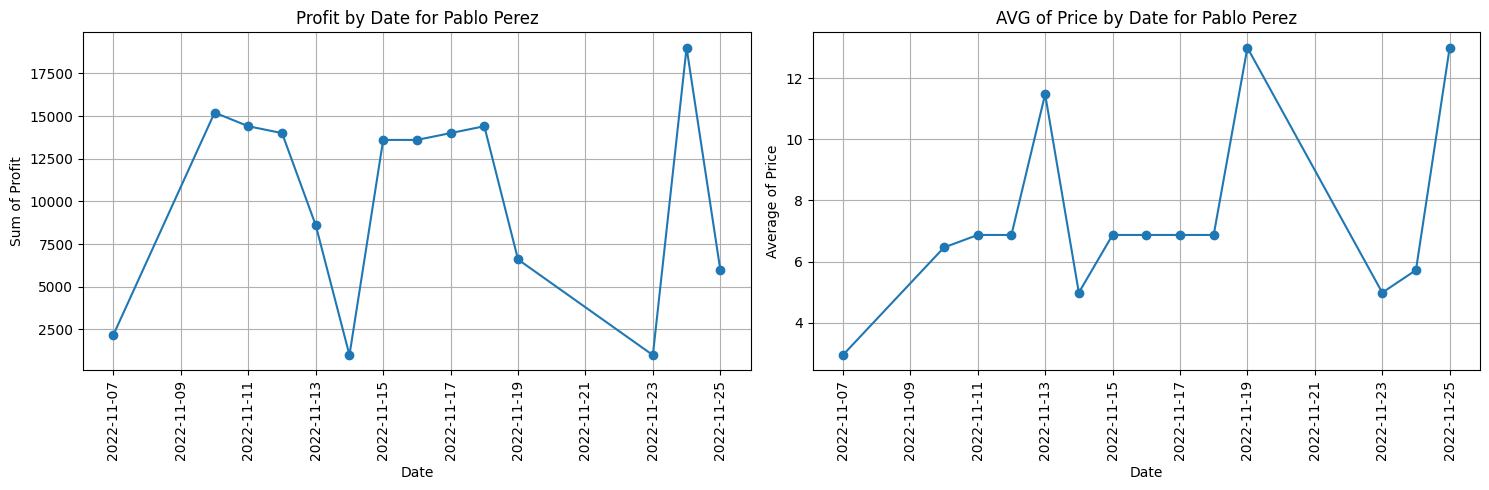

In [ ]:
draw_charts(df_date, 'Pablo Perez')

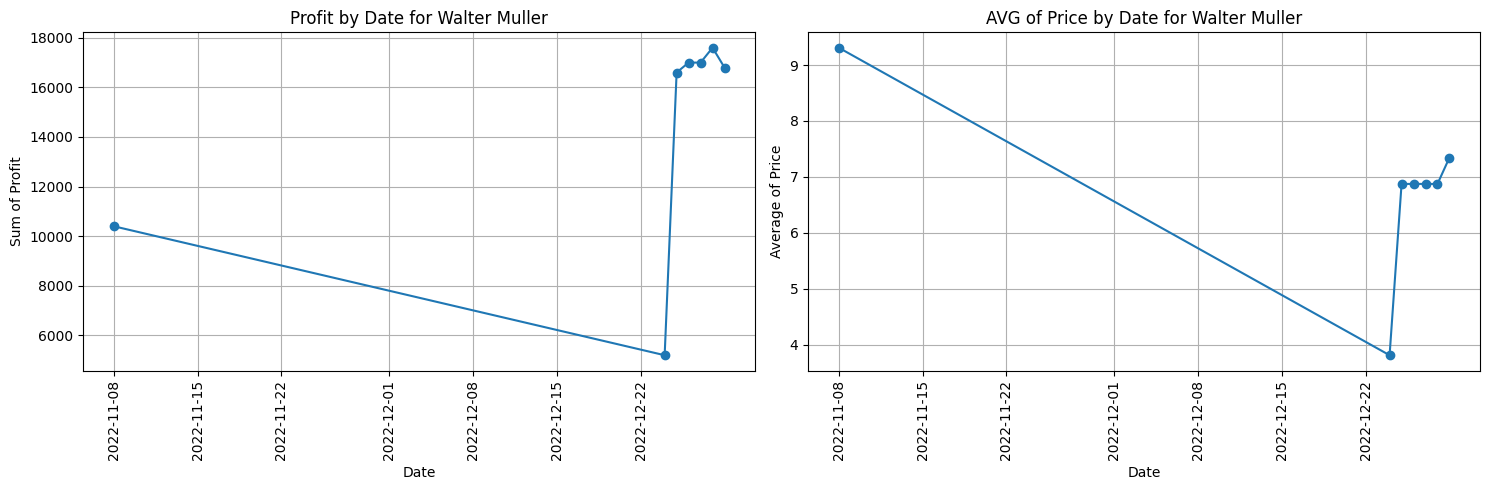

In [ ]:
draw_charts(df_date, 'Walter Muller')

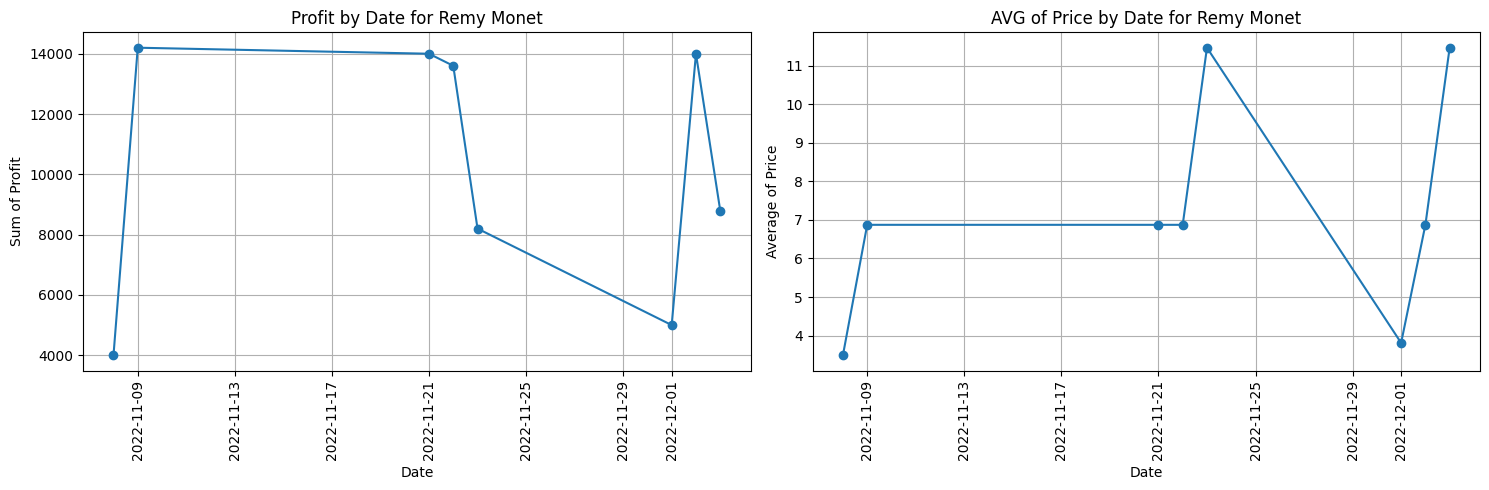

In [ ]:
draw_charts(df_date, 'Remy Monet')